# Importing essential libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import string
import re
from collections import Counter
from nltk.corpus import stopwords

# Load the dataset

In [2]:
pt1= pd.read_csv("E:/EduNet Doc/Content Development/content/Practicals/CSV Files/articles1.csv")
pt2 = pd.read_csv("E:/EduNet Doc/Content Development/content/Practicals/CSV Files/articles2.csv")
pt3 = pd.read_csv("E:/EduNet Doc/Content Development/content/Practicals/CSV Files/articles3.csv")

# Exploring Data

In [3]:
pt1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [4]:
len(pt1)

50000

In [5]:
len(pt2)
pt2.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,53293,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,2017-01-11,2017.0,1.0,NaN,"Patriots Day, Peter Berg’s new thriller that r..."
1,53294,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,2017-01-11,2017.0,1.0,NaN,"In Norse mythology, humans and our world were ..."
2,53295,73474,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...
3,53296,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...
4,53297,73476,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...


In [6]:
len(pt3)
pt3.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,103459,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
1,103460,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...
2,103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
3,103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
4,103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...


In [7]:
# combine all three DataFrames into a single one

articles = pd.concat([pt1,pt2,pt3])
len(articles)

142570

In [8]:
articles.publication.unique()

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic', 'Fox News', 'Talking Points Memo', 'Buzzfeed News',
       'National Review', 'New York Post', 'Guardian', 'NPR', 'Reuters',
       'Vox', 'Washington Post'], dtype=object)

In [9]:
print(articles['year'].min())
articles['year'].max()

2000.0


2017.0

In [10]:
articles['year'].value_counts()

2016.0    85405
2017.0    50404
2015.0     3705
2013.0      228
2014.0      125
2012.0       34
2011.0        8
2010.0        6
2009.0        3
2008.0        3
2005.0        2
2004.0        2
2003.0        2
2007.0        1
2000.0        1
Name: year, dtype: int64

# Produce the original plot

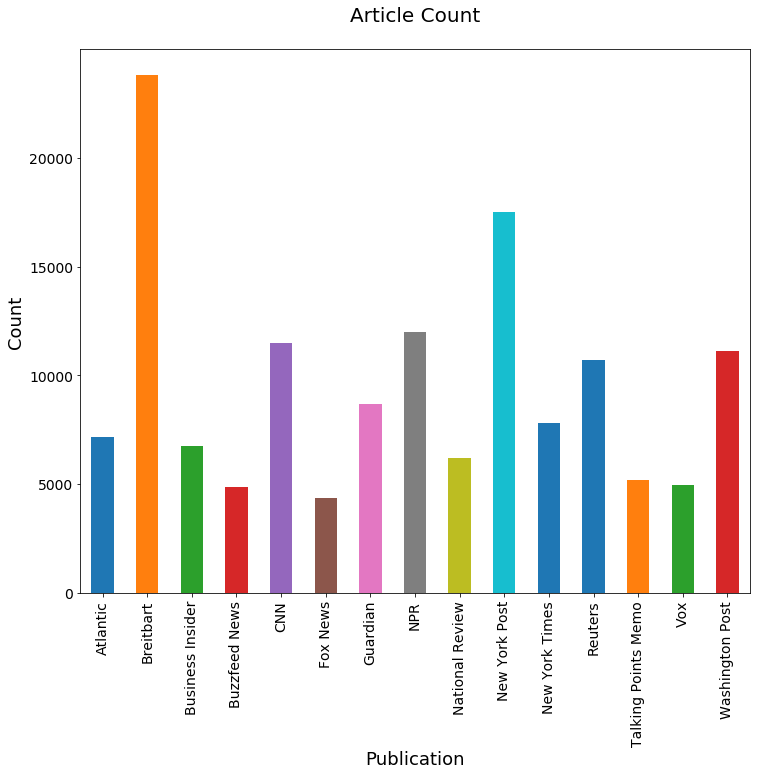

In [11]:
ax = articles['publication'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

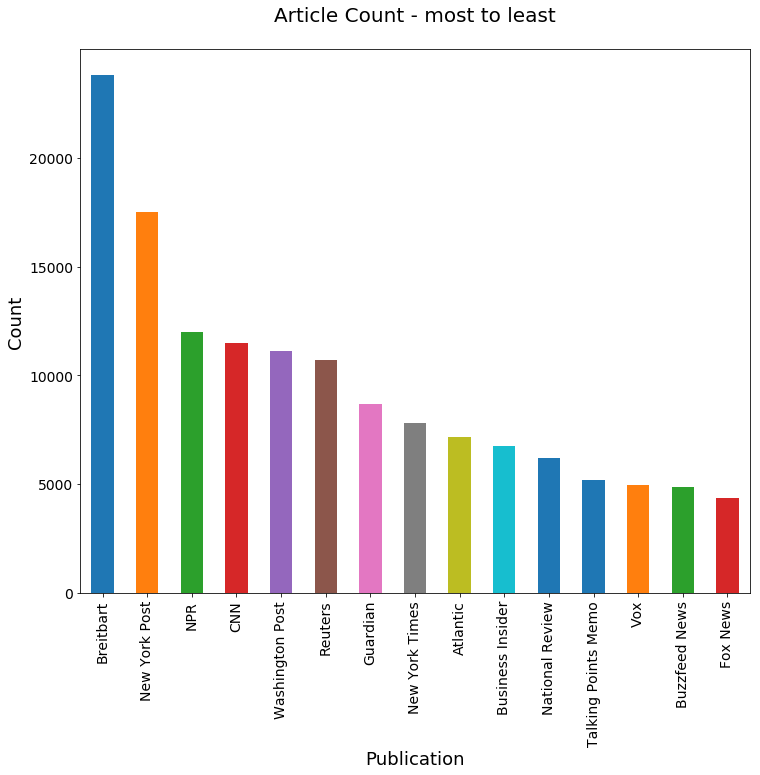

In [12]:
ax = articles['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count - most to least\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

# Removes punctuation and converts all the text to lower case

In [13]:
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [14]:
articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))

In [15]:
articles['tokenized'].head()

0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
Name: tokenized, dtype: object

# Evaluations & Respective Plots

In [16]:
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))
articles['num_wds'].mean()

732.3601248509505

In [17]:
len(articles[articles['num_wds']==0])

97

In [18]:
articles = articles[articles['num_wds']>0]
articles['num_wds'].mean()
articles['num_wds'].min()

1

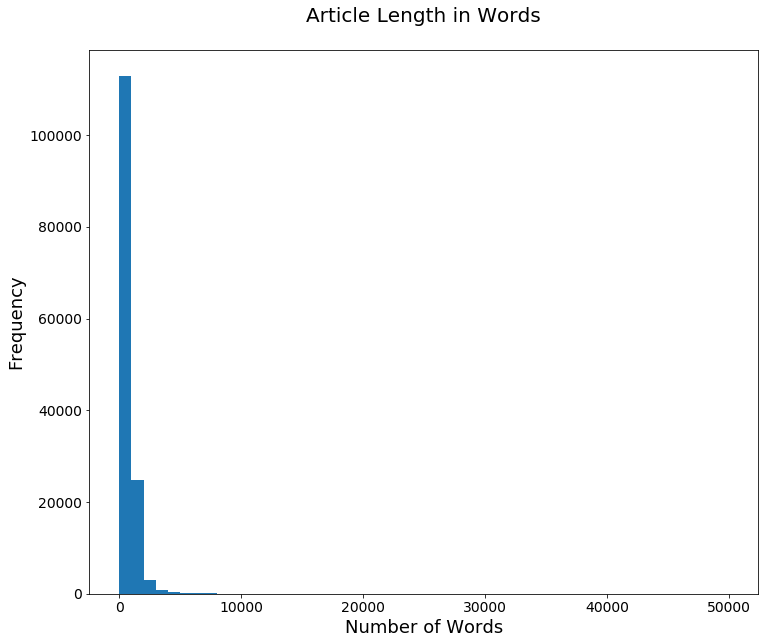

In [19]:
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [20]:
set('b ac b'.split())

{'ac', 'b'}

In [21]:
articles['uniq_wds'] = articles['tokenized'].str.split().apply(lambda x: len(set(x)))
articles['uniq_wds'].head()

0     389
1    1403
2     920
3    1037
4     307
Name: uniq_wds, dtype: int64

In [22]:
articles['uniq_wds'].mean()
articles['uniq_wds'].min()
articles['uniq_wds'].max()

4692

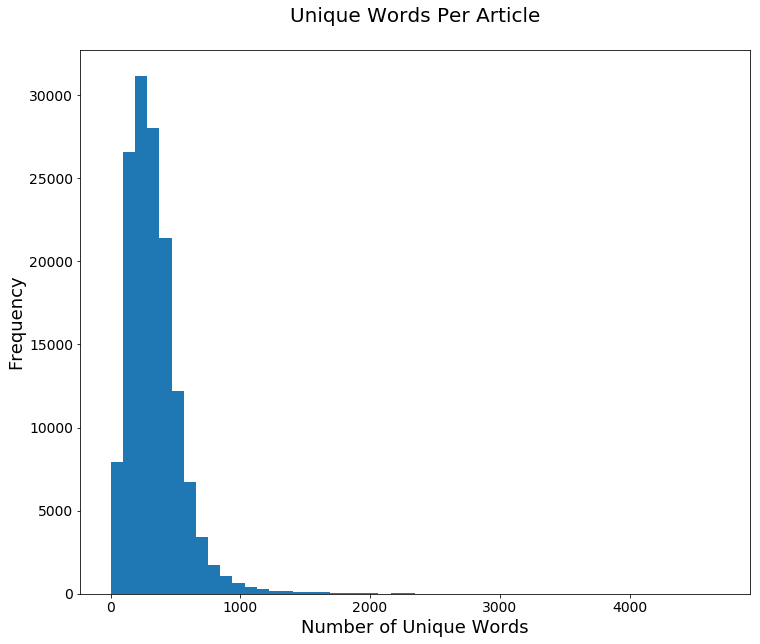

In [23]:
ax=articles['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

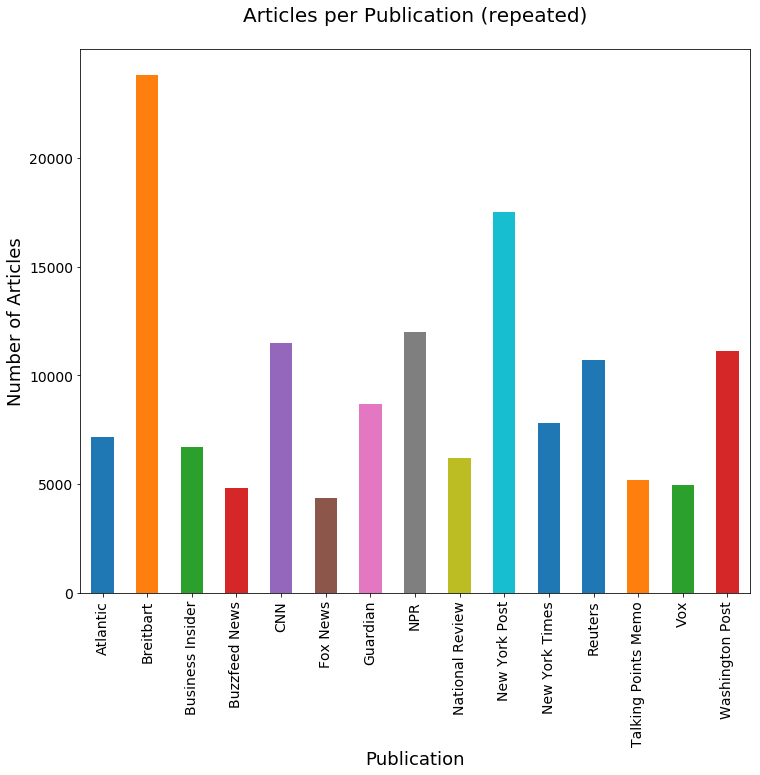

In [24]:
art_grps = articles.groupby('publication')

ax=art_grps['title'].aggregate(len).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Articles per Publication (repeated)\n', fontsize=20)
ax.set_ylabel('Number of Articles', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

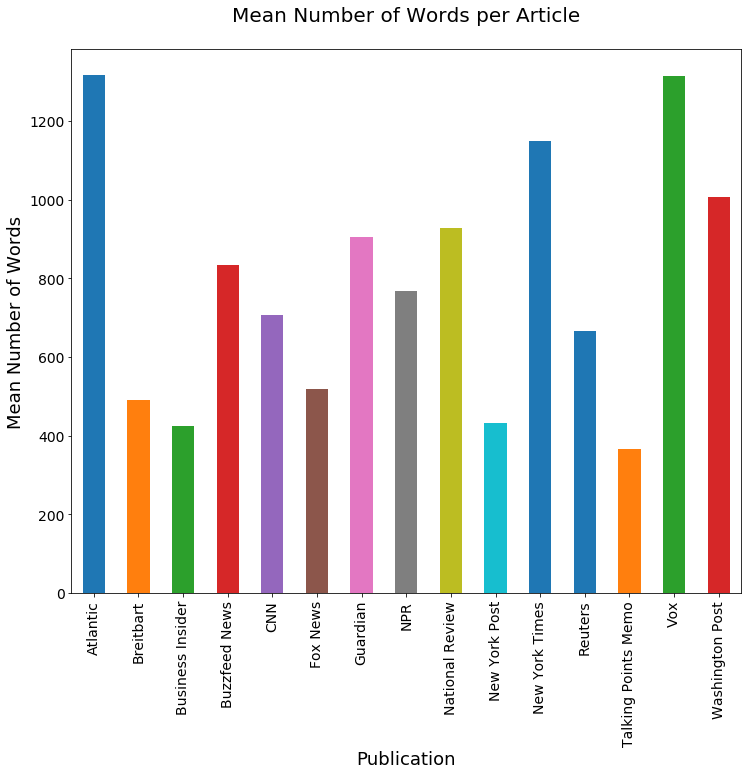

In [25]:
ax=art_grps['num_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Mean Number of Words per Article\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

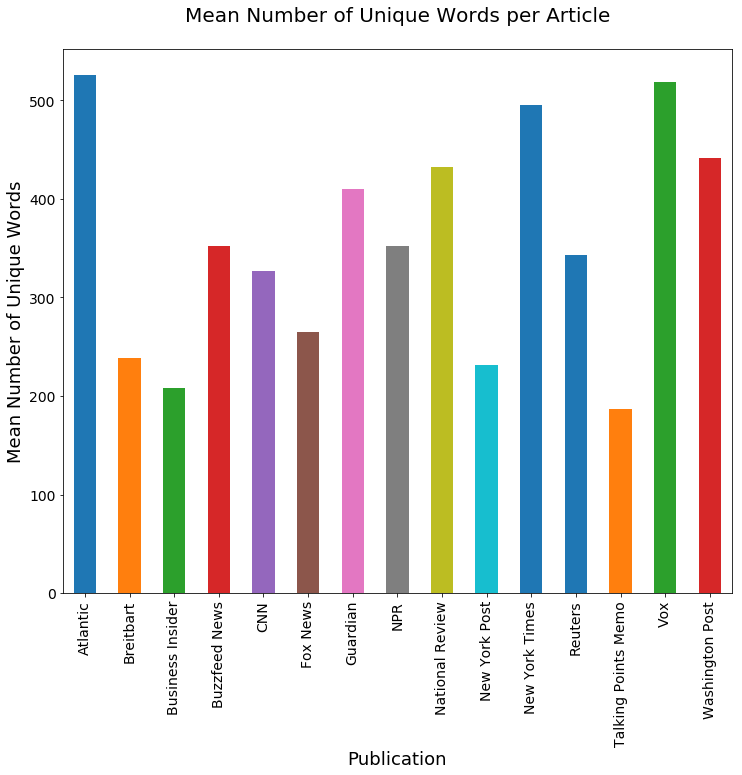

In [26]:
ax=art_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Mean Number of Unique Words per Article\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);